<a href="https://colab.research.google.com/github/wsGit7/Invest/blob/main/pythonWs060625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Introduction to Google Colab and PySpark</center></h1>

## Table Of Contents:
<ol>
<li><a href="#objective">Objective</a></li>
<li><a href="#prerequisite">Prerequisite</a></li>
<li><a href="#notes-from-the-author">Notes from the Author</a></li>
<li><a href="#big-data-pyspark-and-colaboratory">Big data, PySpark and Colaboratory</a>
    <ol>
        <li><a href="#big-data">Big data</a></li>
        <li><a href="#pyspark">PySpark</a></li>
        <li><a href="#colaboratory">Colaboratory</a></li>
    </ol>
</li>
<li><a href="#jupyter-notebook-basics">Jupyter Notebook Basics</a>
    <ol>
        <li><a href="#code-cells">Code cells</a></li>
        <li><a href="#text-cells">Text cells</a></li>
        <li><a href="#access-to-the-shell">Access to the shell</a></li>
        <li><a href="#installing-spark">Installing Spark</a></li>
    </ol>
</li>
<li><a href="#exploring-the-dataset">Exploring the Dataset</a>
    <ol>
        <li><a href="#loading-the-dataset">Loading the Dataset</a></li>
        <li><a href="#viewing-the-dataframe">Viewing the Dataframe</a></li>
        <li><a href="#viewing-dataframe-columns">Viewing Dataframe Columns</a></li>
        <li><a href="#dataframe-schema">Dataframe Schema</a>
          <ul>
            <li><a href="#implicit-schema-inference">Inferring Schema Implicitly</a></li>
            <li><a href="#explicit-schema-inference">Defining Schema Explicitly</a></li>
          </ul>
        </li>
    </ol>
</li>
<li><a href="#dataframe-operations-on-columns">DataFrame Operations on Columns</a>
    <ol>
        <li><a href="#selecting-columns">Selecting Columns</a></li>
        <li><a href="#selecting-multiple-columns">Selecting Multiple Columns</a></li>
        <li><a href="#adding-new-columns">Adding New Columns</a></li>
        <li><a href="#renaming-columns">Renaming Columns</a>
        <li><a href="#grouping-by-columns">Grouping By Columns</a>
        <li><a href="#removing-columns">Removing Columns</a>
    </ol>
</li>
<li><a href="#dataframe-operations-on-rows">DataFrame Operations on Rows</a>
    <ol>
        <li><a href="#filtering-rows">Filtering Rows</a></li>
        <li><a href="#get-distinct-rows">Get Distinct Rows</a></li>
        <li><a href="#sorting-rows">Sorting Rows</a></li>
        <li><a href="#union-dataframes">Union Dataframes</a>
    </ol>
</li>
<li><a href="#common-data-manipulation-functions">Common Data Manipulation Functions</a>
    <ol>
        <li><a href="#string-functions">String Functions</a></li>
        <li><a href="#numeric-functions">Numeric Functions</a></li>
        <li><a href="#operations-on-date">Operations on Date</a></li>
    </ol>
</li>
<li><a href="#joins-in-pyspark">Joins in PySpark</a></li>
<li><a href="#spark-sql">Spark SQL</a></li>
<li><a href="#rdd">RDD</a></li>
<li><a href="#user-defined-functions-udf">User-Defined Functions (UDF)</a></li>
<li><a href="#common-questions">Common Questions</a>
    <ol>
        <li><a href="#recommended-ide">Recommended IDE</a></li>
        <li><a href="#submitting-a-spark-job">Submitting a Spark Job</a></li>
        <li><a href="#creating-dataframes">Creating Dataframes</a></li>
        <li><a href="#drop-duplicates">Drop Duplicates</a></li>
        <li><a href="#fine-tuning-a-pyspark-job">Fine Tuning a PySpark Job</a>
          <ul>
            <li><a href="#emr-sizing">EMR Sizing</a></li>
            <li><a href="#spark-configurations">Spark Configurations</a></li>
            <li><a href="#job-tuning">Job Tuning</a>
            <li><a href="#best-practices">Best Practices</a>
          </ul>
        </li>
    </ol>
</li>
</ol>

<a id='objective'></a>
## Objective
The objective of this notebook is to:
><li>Give a proper understanding about the different PySpark functions available. </li>
><li>A short introduction to Google Colab, as that is the platform on which this notebook is written on. </li>

Once you complete this notebook, you should be able to write pyspark programs in an efficent way. The ideal way to use this is by going through the examples given and then trying them on Colab. At the end there are a few hands on questions which you can use to evaluate yourself.

<a id='prerequisite'></a>
## Prerequisite
><li>Although some theory about pyspark and big data will be given in this notebook, I recommend everyone to read more about it and have a deeper understanding on how the functions get executed and the relevance of big data in the current scenario.
><li>A good understanding on python will be an added bonus.

<a id='notes-from-the-author'></a>
## Notes from the Author

This tutorial was made using Google Colab so the code you see here is meant to run on a colab notebook. <br>
It goes through basic [PySpark Functions](https://spark.apache.org/docs/latest/api/python/index.html) and a short introduction on how to use [Colab](https://colab.research.google.com/notebooks/basic_features_overview.ipynb). <br>
If you want to view my colab notebook for this particular tutorial, you can view it [here](https://colab.research.google.com/drive/1G894WS7ltIUTusWWmsCnF_zQhQqZCDOc). The viewing experience and readability is much better there. <br>
If you want to try out things with this notebook as a base, feel free to download it from my repo [here](https://github.com/jacobceles/knowledge-repo/blob/master/pyspark/Colab%20and%20PySpark.ipynb) and then use it with jupyter notebook.

<a id='big-data-pyspark-and-colaboratory'></a>
## Big data, PySpark and Colaboratory

<a id='big-data'></a>
### Big data

Big data usually means data of such huge volume that normal data storage solutions cannot efficently store and process it. In this era, data is being generated at an absurd rate. Data is collected for each movement a person makes. The bulk of big data comes from three primary sources:
<ol>
   <li>Social data</li>
   <li>Machine data</li>
   <li>Transactional data</li>
</ol>

Some common examples for the sources of such data include internet searches, facebook posts, doorbell cams, smartwatches, online shopping history etc. Every action creates data, it is just a matter of of there is a way to collect them or not.  But what's interesting is that out of all this data collected, not even 5% of it is being used fully. There is a huge demand for big data professionals in the industry. Even though the number of graduates with a specialization in big data are rising, the problem is that they don't have the practical knowledge about big data scenarios, which leads to bad architecutres and inefficent methods of processing data.

>If you are interested to know more about the landscape and technologies involved, here is [an article](https://hostingtribunal.com/blog/big-data-stats/) which I found really interesting!

<a id='pyspark'></a>
### PySpark

If you are working in the field of big data, you must have definelty heard of spark. If you look at the [Apache Spark](https://spark.apache.org/) website, you will see that it is said to be a `Lightning-fast unified analytics engine`. PySpark is a flavour of Spark used for processing and analysing massive volumes of data. If you are familiar with python and have tried it for huge datasets, you should know that the execution time can get ridiculous. Enter PySpark!

Imagine your data resides in a distributed manner at different places. If you try brining your data to one point and executing your code there, not only would that be inefficent, but also cause memory issues. Now let's say your code goes to the data rather than the data coming to where your code. This will help avoid unneccesary data movement which will thereby decrease the running time.

PySpark is the Python API of Spark; which means it can do almost all the things python can. Machine learning(ML) pipelines, exploratory data analysis (at scale), ETLs for data platform, and much more! And all of them in a distributed manner. One of the best parts of pyspark is that if you are already familiar with python, it's really easy to learn.

Apart from PySpark, there is another language called Scala used for big data processing. Scala is frequently over 10 times faster than *Python*, as it is native for Hadoop as its based on JVM. But PySpark is getting adopted at a fast rate because of the ease of use, easier learning curve and ML capabilities.

I will briefly explain how a PySpark job works, but I strongly recommend you read more about the [architecture](https://data-flair.training/blogs/how-apache-spark-works/) and how everything works. Now, before I get into it, let me talk about some <u>basic jargons</u> first:

<b>Cluster</b> is a set of loosely or tightly connected computers that work together so that they can be viewed as a single system.

<b>Hadoop</b> is an open source, scalable, and fault tolerant framework written in Java. It efficiently processes large volumes of data on a cluster of commodity hardware. Hadoop is not only a storage system but is a platform for large data storage as well as processing.

<b>HDFS</b> (Hadoop distributed file system). It is one of the world's most reliable storage system. HDFS is a Filesystem of Hadoop designed for storing very large files running on a cluster of commodity hardware.

<b>MapReduce</b> is a data Processing framework, which has 2 phases - Mapper and Reducer. The map procedure performs filtering and sorting, and the reduce method performs a summary operation. It usually runs on a hadoop cluster.

<b>Transformation</b> refers to the operations applied on a dataset to create a new dataset. Filter, groupBy and map are the examples of transformations.

<b>Actions</b> Actions refer to an operation which instructs Spark to perform computation and send the result back to driver. This is an example of action.

Alright! Now that that's out of the way, let me explain how a spark job runs. In simple terma, each time you submit a pyspark job, the code gets internally converted into a MapReduce program and gets executed in the Java virtual machine. Now one of the thoughts that might be popping in your mind will probably be: <br>`So the code gets converted into a MapReduce program. Wouldn't that mean MapReduce is faster than pySpark?`<br> Well, the answer is a big NO. This is what makes spark jobs special. Spark is capable of handling a massive amount of data at a time, in it's distributed environment. It does this through <u>in-memory processing</u>, which is what makes it almost 100 times faster than Hadoop. Another factor which amkes it fast is <u>Lazy Evaluation</u>. Spark delays its evaluation as much as it can. Each time you  submit a job, spark creates an action plan for how to execute the code, and then does nothing. Finally, when you ask for the result(i.e, calls an action), it executes the plan, which is basically all the transofrmations you have mentioned in your code. That's basically the gist of it.

Now lastly, I want to talk about on more thing. Spark mainly consists of 4 modules:

<ol>
    <li>Spark SQL - helps to write  spark programs using SQL like queries.</li>
    <li>Spark Streaming - is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams. used heavily in processing of social media data.</li>
    <li>Spark MLLib - is the machine learning component of SPark. It helps train ML models on massive datasets with very high efficeny. </li>
    <li>Spark GraphX - is the visualization component of Spark. It enables users to view data both as graphs and as collections without data movement or duplication.</li>
</ol>

Hopefully this image gives a better idea of what I am talking about:
<img alt="Spark Modules" src="https://2s7gjr373w3x22jf92z99mgm5w-wpengine.netdna-ssl.com/wp-content/uploads/2015/11/spark-streaming-datanami.png" />
<center><font color='#666956'>Source: Datanami</font><center>


<a id='colaboratory'></a>
### Colaboratory

In the words of Google: <br>
`Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs.`

The reason why I used colab is because of its shareability and free GPU and TPU. Yeah you read that right, FREE GPU AND TPU! For using TPU, your program needs to be optimized for the same. Additionally, it helps use different Google services conveniently. It saves to Google Drive and all the services are very closely related. I recommend you go through the offical [overview documentation](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) if you want to know more about it.
If you have more questions about colab, please [refer this link](https://research.google.com/colaboratory/faq.html).

>While using a colab notebook, you will need an active internet connection to keep a session alive. If you lose the connection you will have to download the datasets again.

<a id='jupyter-notebook-basics'></a>
## Jupyter notebook basics

<a id='code-cells'></a>
### Code cells

In [ ]:
2*3

6

In [ ]:
from collections import Counter

In [ ]:
print("This is a tutorial!")

This is a tutorial!


<a id='text-cells'></a>
### Text cells

Hello world!

<a id='access-to-the-shell'></a>
### Access to the shell

In [ ]:
ls

sample_data/


In [ ]:
pwd

'/content'

<a id='installing-spark'></a>
### Installing Spark

Install Dependencies:


1.   Java 8
2.   Apache Spark with hadoop and
3.   Findspark (used to locate the spark in the system)

> If you have issues with spark version, please upgrade to the latest version from [here](https://archive.apache.org/dist/spark/).

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

Set Environment Variables:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [ ]:
!ls

sample_data  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

<a id='exploring-the-dataset'></a>
## Exploring the Dataset

<a id='loading-the-dataset'></a>
### Loading the Dataset

In [ ]:
# Downloading and preprocessing Cars Data downloaded origianlly from https://perso.telecom-paristech.fr/eagan/class/igr204/datasets
!wget https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv

--2024-07-01 13:01:19--  https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobceles.github.io (jacobceles.github.io)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to jacobceles.github.io (jacobceles.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv [following]
--2024-07-01 13:01:20--  https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobcelestine.com (jacobcelestine.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobcelestine.com (jacobcelestine.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22608 (22K) [text/csv]
Saving to: ‘cars.csv’

cars.csv            100%[===================>]  22.08K  --.-KB/s    in 0s      

2024-07-01 13:01:20 (79.2 MB/s) - ‘cars.csv’ saved [22608/22608]



In [ ]:
!ls

cars.csv  sample_data  spark-3.5.1-bin-hadoop3	spark-3.5.1-bin-hadoop3.tgz


In [ ]:
# Load data from csv to a dataframe.
# header=True means the first row is a header
# sep=';' means the column are seperated using ''
df = spark.read.csv('cars.csv', header=True, sep=";")
df.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



The above command loads our data from into a dataframe (DF). A dataframe is a 2-dimensional labeled data structure with columns of potentially different types.

<a id='viewing-the-dataframe'></a>
### Viewing the Dataframe

There are a couple of ways to view your dataframe(DF) in PySpark:

1.   `df.take(5)` will return a list of five Row objects.
2.   `df.collect()` will get all of the data from the entire DataFrame. Be really careful when using it, because if you have a large data set, you can easily crash the driver node.
3.   `df.show()` is the most commonly used method to view a dataframe. There are a few parameters we can pass to this method, like the number of rows and truncaiton. For example, `df.show(5, False)` or ` df.show(5, truncate=False)` will show the entire data wihtout any truncation.
4.   `df.limit(5)` will **return a new DataFrame** by taking the first n rows. As spark is distributed in nature, there is no guarantee that `df.limit()` will give you the same results each time.

Let us see some of them in action below:

In [ ]:
df.show(5, truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [ ]:
df.limit(5)

Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
Chevrolet Chevell...,18.0,8,307.0,130.0,3504.,12.0,70,US
Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


<a id='viewing-dataframe-columns'></a>
### Viewing Dataframe Columns

In [ ]:
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

<a id='dataframe-schema'></a>
### Dataframe Schema

There are two methods commonly used to view the data types of a dataframe:

In [ ]:
df.dtypes

[('Car', 'string'),
 ('MPG', 'string'),
 ('Cylinders', 'string'),
 ('Displacement', 'string'),
 ('Horsepower', 'string'),
 ('Weight', 'string'),
 ('Acceleration', 'string'),
 ('Model', 'string'),
 ('Origin', 'string')]

In [ ]:
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



<a id='implicit-schema-inference'></a>
#### Inferring Schema Implicitly

We can use the parameter `inferschema=true` to infer the input schema automatically while loading the data. An example is shown below:

In [ ]:
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: decimal(4,0) (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



As you can see, the datatype has been infered automatically spark with even the correct precison for decimal type. A problem that might arise here is that sometimes, when you have to read multiple files with different schemas in different files, there might be an issue with implicit inferring leading to null values in some columns. Therefore, let us also see how to define schemas explicitly.

<a id='explicit-schema-inference'></a>
#### Defining Schema Explicitly

In [ ]:
from pyspark.sql.types import *
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

In [ ]:
# Creating a list of the schema in the format column_name, data_type
labels = [
     ('Car',StringType()),
     ('MPG',DoubleType()),
     ('Cylinders',IntegerType()),
     ('Displacement',DoubleType()),
     ('Horsepower',DoubleType()),
     ('Weight',DoubleType()),
     ('Acceleration',DoubleType()),
     ('Model',IntegerType()),
     ('Origin',StringType())
]

In [ ]:
# Creating the schema that will be passed when reading the csv
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType([StructField('Car', StringType(), True), StructField('MPG', DoubleType(), True), StructField('Cylinders', IntegerType(), True), StructField('Displacement', DoubleType(), True), StructField('Horsepower', DoubleType(), True), StructField('Weight', DoubleType(), True), StructField('Acceleration', DoubleType(), True), StructField('Model', IntegerType(), True), StructField('Origin', StringType(), True)])

In [ ]:
df = spark.read.csv('cars.csv', header=True, sep=";", schema=schema)
df.printSchema()
# The schema comes as we gave!

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



In [ ]:
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |
|Plymouth Satellite              |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |
|AMC Rebel SST                   |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |
|Ford Torino                     |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |
|Ford Galaxie 500                |15.0|8        |429.0       |198.0     |4341.0|10.0        |70   |US    |
|Chevrolet Impala                |14.

As we can see here, the data has been successully loaded with the specified datatypes.

<a id='dataframe-operations-on-columns'></a>
## DataFrame Operations on Columns

We will go over the following in this section:

1.   Selecting Columns
2.   Selecting Multiple Columns
3.   Adding New Columns
4.   Renaming Columns
5.   Grouping By Columns
6.   Removing Columns



<a id='selecting-columns'></a>
### Selecting Columns

There are multiple ways to do a select in PySpark. You can find how they differ and how each below:

In [ ]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car)
print("*"*20)
df.select(df.Car).show(truncate=False)

Column<'Car'>
********************
+--------------------------------+
|Car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



**NOTE:**

> **We can't always use the dot notation because this will break when the column names have reserved names or attributes to the data frame class. Additionally, the column names are case sensitive in nature so we need to always make sure the column names have been changed to a paticular case before using it.**



In [ ]:
# 2nd method
# Column name is case insensitive here
print(df['car'])
print("*"*20)
df.select(df['car']).show(truncate=False)

Column<'car'>
********************
+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [ ]:
# 3rd method
# Column name is case insensitive here
from pyspark.sql.functions import col
df.select(col('car')).show(truncate=False)

+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



<a id='selecting-multiple-columns'></a>
### Selecting Multiple Columns

In [ ]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car, df.Cylinders)
print("*"*40)
df.select(df.Car, df.Cylinders).show(truncate=False)

Column<'Car'> Column<'Cylinders'>
****************************************
+--------------------------------+---------+
|Car                             |Cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [ ]:
# 2nd method
# Column name is case insensitive in this usage
print(df['car'],df['cylinders'])
print("*"*40)
df.select(df['car'],df['cylinders']).show(truncate=False)

Column<'car'> Column<'cylinders'>
****************************************
+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [ ]:
# 3rd method
# Column name is case insensitive in this usage
from pyspark.sql.functions import col
df.select(col('car'),col('cylinders')).show(truncate=False)

+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet Monte Carlo           |8        |
|Buick Est

<a id='adding-new-columns'></a>
### Adding New Columns

We will take a look at three cases here:

1.   Adding a new column
2.   Adding multiple columns
3.   Deriving a new column from an exisitng one

In [ ]:
# CASE 1: Adding a new column
# We will add a new column called 'first_column' at the end
from pyspark.sql.functions import lit
df = df.withColumn('first_column',lit(1))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |1           |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |1           |
+-------------------------+----+---------+------------+----------+------+------------+-----+----

In [ ]:
# CASE 2: Adding multiple columns
# We will add two new columns called 'second_column' and 'third_column' at the end
df = df.withColumn('second_column', lit(2)) \
       .withColumn('third_column', lit('Third Column'))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|second_column|third_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |2            |Third Column|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |2            |Third Column|
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |2            |Third Column|
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |1           |2            |Third Column|
|Ford Torino        

In [ ]:
# CASE 3: Deriving a new column from an exisitng one
# We will add a new column called 'car_model' which has the value of car and model appended together with a space in between
from pyspark.sql.functions import concat
df = df.withColumn('car_model', concat(col("Car"), lit(" "), col("model")))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|second_column|third_column|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |2            |Third Column|Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |2            |Third Column|Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |2            |Third Column|Plymouth Satelli

As we can see, the new column car model has been created from existing columns. Since our aim was to create a column which has the value of car and model appended together with a space in between we have used the `concat` operator.

<a id='renaming-columns'></a>
### Renaming Columns

We use the `withColumnRenamed` function to rename a columm in PySpark. Let us see it in action below:

In [ ]:
#Renaming a column in PySpark
df = df.withColumnRenamed('first_column', 'new_column_one') \
       .withColumnRenamed('second_column', 'new_column_two') \
       .withColumnRenamed('third_column', 'new_column_three')
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_one|new_column_two|new_column_three|car_model                          |
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1             |2             |Third Column    |Chevrolet Chevelle Malibu 70       |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1             |2             |Third Column    |Buick Skylark 320 70               |
|Plymouth Satellite              |18.0|8        |3

<a id='grouping-by-columns'></a>
### Grouping By Columns

Here, we see the Dataframe API way of grouping values. We will discuss how to:


1.   Group By a single column
2.   Group By multiple columns

In [ ]:
# Group By a column in PySpark
df.groupBy('Origin').count().show(5)

+------+-----+
|Origin|count|
+------+-----+
|Europe|   73|
|    US|  254|
| Japan|   79|
+------+-----+



In [ ]:
# Group By multiple columns in PySpark
df.groupBy('Origin', 'Model').count().show(5)

+------+-----+-----+
|Origin|Model|count|
+------+-----+-----+
|Europe|   71|    5|
|Europe|   80|    9|
|Europe|   79|    4|
| Japan|   75|    4|
|    US|   72|   18|
+------+-----+-----+
only showing top 5 rows



<a id='removing-columns'></a>
### Removing Columns

In [ ]:
#Remove columns in PySpark
df = df.drop('new_column_one')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_two|new_column_three|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |2             |Third Column    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |2             |Third Column    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |2             |Third Column    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8 

In [ ]:
#Remove multiple columnss in one go
df = df.drop('new_column_two') \
       .drop('new_column_three')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |AMC Rebel SST 70            |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US   

<a id='dataframe-operations-on-rows'></a>
## DataFrame Operations on Rows

We will discuss the follwoing in this section:

1.   Filtering Rows
2. 	 Get Distinct Rows
3.   Sorting Rows
4.   Union Dataframes



<a id='filtering-rows'></a>
### Filtering Rows

In [ ]:
# Filtering rows in PySpark
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter(col('Origin')=='Europe').count()
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406
EUROPE FILTERED RECORD COUNT: 73
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Citroen DS-21 Pallas        |0.0 |4        |133.0       |115.0     |3090.0|17.5        |70   |Europe|Citroen DS-21 Pallas 70        |
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.0        |46.0      |1835.0|20.5        |70   |Europe|Volkswagen 1131 Deluxe Sedan 70|
|Peugeot 504                 |25.0|4        |110.0       |87.0      |2672.0|17.5        |70   |Europe|Peugeot 504 70                 |
|Audi 100 LS                 |24.0|4        |107.0       |90.0      |2430.0|14.5        |70   |Europe|Audi 100 LS 70                 

In [ ]:
# Filtering rows in PySpark based on Multiple conditions
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter((col('Origin')=='Europe') &
                                  (col('Cylinders')==4)).count() # Two conditions added here
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406
EUROPE FILTERED RECORD COUNT: 66
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Citroen DS-21 Pallas        |0.0 |4        |133.0       |115.0     |3090.0|17.5        |70   |Europe|Citroen DS-21 Pallas 70        |
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.0        |46.0      |1835.0|20.5        |70   |Europe|Volkswagen 1131 Deluxe Sedan 70|
|Peugeot 504                 |25.0|4        |110.0       |87.0      |2672.0|17.5        |70   |Europe|Peugeot 504 70                 |
|Audi 100 LS                 |24.0|4        |107.0       |90.0      |2430.0|14.5        |70   |Europe|Audi 100 LS 70                 

<a id='get-distinct-rows'></a>
### Get Distinct Rows

In [ ]:
#Get Unique Rows in PySpark
df.select('Origin').distinct().show()

+------+
|Origin|
+------+
|Europe|
|    US|
| Japan|
+------+



In [ ]:
#Get Unique Rows in PySpark based on mutliple columns
df.select('Origin','model').distinct().show()

+------+-----+
|Origin|model|
+------+-----+
|Europe|   71|
|Europe|   80|
|Europe|   79|
| Japan|   75|
|    US|   72|
|    US|   80|
|Europe|   74|
| Japan|   79|
|Europe|   76|
|    US|   75|
| Japan|   77|
|    US|   82|
| Japan|   80|
| Japan|   78|
|    US|   78|
|Europe|   75|
|    US|   71|
|    US|   77|
| Japan|   70|
| Japan|   71|
+------+-----+
only showing top 20 rows



<a id='sorting-rows'></a>
### Sorting Rows

In [ ]:
# Sort Rows in PySpark
# By default the data will be sorted in ascending order
df.orderBy('Cylinders').show(truncate=False)

+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Mazda RX2 Coupe             |19.0|3        |70.0        |97.0      |2330.0|13.5        |72   |Japan |Mazda RX2 Coupe 72             |
|Mazda RX3                   |18.0|3        |70.0        |90.0      |2124.0|13.5        |73   |Japan |Mazda RX3 73                   |
|Mazda RX-4                  |21.5|3        |80.0        |110.0     |2720.0|13.5        |77   |Japan |Mazda RX-4 77                  |
|Mazda RX-7 GS               |23.7|3        |70.0        |100.0     |2420.0|12.5        |80   |Japan |Mazda RX-7 GS 80               |
|Datsun 510 (sw)             |28.0|4        |97.0      

In [ ]:
# To change the sorting order, you can use the ascending parameter
df.orderBy('Cylinders', ascending=False).show(truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Plymouth 'Cuda 340       |14.0|8        |340.0       |160.0     |3609.0|8.0         |70   |US    |Plymouth 'Cuda 340 70       |
|Pontiac Safari (sw)      |13.0|8        |400.0       |175.0     |5140.0|12.0        |71   |US    |Pontiac Safari (sw) 71      |
|Ford Mustang Boss 302    |0.0 |8        |302.0       |140.0     |3353.0|8.0         |70   |US    |Ford Mustang Boss 302 70    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Chevrolet Monte Carlo    |15.0|8        |400.0       |150.0     |3761.0|9.5         |70   |US   

In [ ]:
# Using groupBy aand orderBy together
df.groupBy("Origin").count().orderBy('count', ascending=False).show(10)

+------+-----+
|Origin|count|
+------+-----+
|    US|  254|
| Japan|   79|
|Europe|   73|
+------+-----+



<a id='union-dataframes'></a>
### Union Dataframes

You will see three main methods for performing union of dataframes. It is important to know the difference between them and which one is preferred:

*   `union()` – It is used to merge two DataFrames of the same structure/schema. If schemas are not the same, it returns an error
*   `unionAll()` – This function is deprecated since Spark 2.0.0, and replaced with union()
*   `unionByName()` - This function is used to merge two dataframes based on column name.

> Since `unionAll()` is deprecated, **`union()` is the preferred method for merging dataframes.**
<br>
> The difference between `unionByName()` and `union()` is that `unionByName()` resolves columns by name, not by position.

In other SQLs, Union eliminates the duplicates but UnionAll merges two datasets, thereby including duplicate records. But, in PySpark, both behave the same and includes duplicate records. The recommendation is to use `distinct()` or `dropDuplicates()` to remove duplicate records.

In [ ]:
# CASE 1: Union When columns are in order
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
europe_cars = df.filter((col('Origin')=='Europe') & (col('Cylinders')==5))
japan_cars = df.filter((col('Origin')=='Japan') & (col('Cylinders')==3))
print("EUROPE CARS: "+str(europe_cars.count()))
print("JAPAN CARS: "+str(japan_cars.count()))
print("AFTER UNION: "+str(europe_cars.union(japan_cars).count()))

EUROPE CARS: 3
JAPAN CARS: 4
AFTER UNION: 7


**Result:**

> As you can see here, there were 3 cars from Europe with 5 Cylinders, and 4 cars from Japan with 3 Cylinders. After union, there are 7 cars in total.



In [ ]:
# CASE 1: Union When columns are not in order
# Creating two dataframes with jumbled columns
df1 = spark.createDataFrame([[1, 2, 3]], ["col0", "col1", "col2"])
df2 = spark.createDataFrame([[4, 5, 6]], ["col1", "col2", "col0"])
df1.unionByName(df2).show()

+----+----+----+
|col0|col1|col2|
+----+----+----+
|   1|   2|   3|
|   6|   4|   5|
+----+----+----+



**Result:**

> As you can see here, the two dataframes have been successfully merged based on their column names.



<a id='common-data-manipulation-functions'></a>
## Common Data Manipulation Functions

In [ ]:
# Functions available in PySpark
from pyspark.sql import functions
# Similar to python, we can use the dir function to view the avaiable functions
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

<a id='string-functions'></a>
### String Functions

In [ ]:
# Loading the data
from pyspark.sql.functions import col
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)

**Display the Car column in exisitng, lower and upper characters, and the first 4 characters of the column**

In [ ]:
from pyspark.sql.functions import col,lower, upper, substring
# Prints out the details of a function
help(substring)
# alias is used to rename the column name in the output
df.select(col('Car'),lower(col('Car')),upper(col('Car')),substring(col('Car'),1,4).alias("concatenated value")).show(5, False)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]

+---------------

**Concatenate the Car column and Model column and add a space between them.**

In [ ]:
from pyspark.sql.functions import concat
df.select(col("Car"),col("model"),concat(col("Car"), lit(" "), col("model"))).show(5, False)

+-------------------------+-----+----------------------------+
|Car                      |model|concat(Car,  , model)       |
+-------------------------+-----+----------------------------+
|Chevrolet Chevelle Malibu|70   |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |70   |Buick Skylark 320 70        |
|Plymouth Satellite       |70   |Plymouth Satellite 70       |
|AMC Rebel SST            |70   |AMC Rebel SST 70            |
|Ford Torino              |70   |Ford Torino 70              |
+-------------------------+-----+----------------------------+
only showing top 5 rows



<a id='numeric-functions'></a>
### Numeric functions

**Show the oldest date and the most recent date**

In [ ]:
from pyspark.sql.functions import min, max
df.select(min(col('Weight')), max(col('Weight'))).show()

+-----------+-----------+
|min(Weight)|max(Weight)|
+-----------+-----------+
|       1613|       5140|
+-----------+-----------+



**Add 10 to the minimum and maximum weight**

In [ ]:
from pyspark.sql.functions import min, max, lit
df.select(min(col('Weight'))+lit(10), max(col('Weight')+lit(10))).show()

+------------------+------------------+
|(min(Weight) + 10)|max((Weight + 10))|
+------------------+------------------+
|              1623|              5150|
+------------------+------------------+



<a id='operations-on-date'></a>
### Operations on Date

> [PySpark follows SimpleDateFormat table of Java. Click here to view the docs.](https://docs.oracle.com/javase/7/docs/api/java/text/SimpleDateFormat.html)

In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df.show()
df.printSchema()

+-------------------+
|                DOB|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+

root
 |-- DOB: string (nullable = true)



In [ ]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('DOB'),'yyyy-MM-dd HH:mm:ss'))
df.show()
df.printSchema()

+---------------------------------+--------------------------------------+
|to_date(DOB, yyyy-MM-dd HH:mm:ss)|to_timestamp(DOB, yyyy-MM-dd HH:mm:ss)|
+---------------------------------+--------------------------------------+
|                       2019-12-25|                   2019-12-25 13:30:00|
+---------------------------------+--------------------------------------+

root
 |-- to_date(DOB, yyyy-MM-dd HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, yyyy-MM-dd HH:mm:ss): timestamp (nullable = true)



In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('DOB'),'dd/MMM/yyyy HH:mm:ss'))
df.show()
df.printSchema()

+----------------------------------+---------------------------------------+
|to_date(DOB, dd/MMM/yyyy HH:mm:ss)|to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------+---------------------------------------+
|                        2019-12-25|                    2019-12-25 13:30:00|
+----------------------------------+---------------------------------------+

root
 |-- to_date(DOB, dd/MMM/yyyy HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss): timestamp (nullable = true)



**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [ ]:
from pyspark.sql.functions import date_add, date_sub
# create a dummy dataframe
df = spark.createDataFrame([('1990-01-01',),('1995-01-03',),('2021-03-30',)], ['Date'])
# find out the required dates
df.select(date_add(max(col('Date')),3), date_sub(min(col('Date')),3)).show()

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2021-04-02|            1989-12-29|
+----------------------+----------------------+



<a id='joins-in-pyspark'></a>
## Joins in PySpark

In [ ]:
# Create two dataframes
cars_df = spark.createDataFrame([[1, 'Car A'],[2, 'Car B'],[3, 'Car C']], ["id", "car_name"])
car_price_df = spark.createDataFrame([[1, 1000],[2, 2000],[3, 3000]], ["id", "car_price"])
cars_df.show()
car_price_df.show()

+---+--------+
| id|car_name|
+---+--------+
|  1|   Car A|
|  2|   Car B|
|  3|   Car C|
+---+--------+

+---+---------+
| id|car_price|
+---+---------+
|  1|     1000|
|  2|     2000|
|  3|     3000|
+---+---------+



In [ ]:
# Executing an inner join so we can see the id, name and price of each car in one row
cars_df.join(car_price_df, cars_df.id == car_price_df.id, 'inner').select(cars_df['id'],cars_df['car_name'],car_price_df['car_price']).show(truncate=False)

+---+--------+---------+
|id |car_name|car_price|
+---+--------+---------+
|1  |Car A   |1000     |
|2  |Car B   |2000     |
|3  |Car C   |3000     |
+---+--------+---------+



As you can see, we have done an inner join between two dataframes. The following joins are supported by PySpark:
1. inner (default)
2. cross
3. outer
4. full
5. full_outer
6. left
7. left_outer
8. right
9. right_outer
10. left_semi
11. left_anti

<a id='spark-sql'></a>
## Spark SQL

SQL has been around since the 1970s, and so one can imagine the number of people who made it their bread and butter. As big data came into popularity, the number of professionals with the technical knowledge to deal with it was in shortage. This led to the creation of Spark SQL. To quote the docs:<br>
>Spark SQL is a Spark module for structured data processing. Unlike the basic Spark RDD API, the interfaces provided by Spark SQL provide Spark with more information about the structure of both the data and the computation being performed. Internally, Spark SQL uses this extra information to perform extra optimizations.

Basically, what you need to know is that Spark SQL is used to execute SQL queries on big data. Spark SQL can also be used to read data from Hive tables and views. Let me explain Spark SQL with an example.


In [ ]:
# Load data
df = spark.read.csv('cars.csv', header=True, sep=";")
# Register Temporary Table
df.createOrReplaceTempView("temp")
# Select all data from temp table
spark.sql("select * from temp limit 5").show()
# Select count of data in table
spark.sql("select count(*) as total_count from temp").show()

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+

+-----------+
|total_count|
+-----------+
|        406|
+-----------+



As you can see, we registered the dataframe as temporary table and then ran basic SQL queries on it. How amazing is that?!<br>
If you are a person who is more comfortable with SQL, then this feature is truly a blessing for you! But this raises a question:
> *Should I just keep using Spark SQL all the time?*

And the answer is, _**it depends**_.<br>
So basically, the different functions acts in differnet ways, and depending upon the type of action you are trying to do, the speed at which it completes execution also differs. But as time progress, this feature is getting better and better, so hopefully the difference should be a small margin. There are plenty of analysis done on this, but nothing has a definite answer yet. You can read this [comparative study done by horton works](https://community.cloudera.com/t5/Community-Articles/Spark-RDDs-vs-DataFrames-vs-SparkSQL/ta-p/246547) or the answer to this [stackoverflow question](https://stackoverflow.com/questions/45430816/writing-sql-vs-using-dataframe-apis-in-spark-sql) if you are still curious about it.

<a id='rdd'></a>
## RDD

> With map, you define a function and then apply it record by record. Flatmap returns a new RDD by first applying a function to all of the elements in RDDs and then flattening the result. Filter, returns a new RDD. Meaning only the elements that satisfy a condition. With reduce, we are taking neighboring elements and producing a single combined result.
For example, let's say you have a set of numbers. You can reduce this to its sum by providing a function that takes as input two values and reduces them to one.

Some of the reasons you would use a dataframe over RDD are:
1.   It's ability to represnt data as rows and columns. But this also means it can only hold structred and semi-structured data.
2.   It allows processing data in different formats (AVRO, CSV, JSON, and storage system HDFS, HIVE tables, MySQL).
3. It's superior job Optimization capability.
4. DataFrame API is very easy to use.





In [ ]:
cars = spark.sparkContext.textFile('cars.csv')
print(cars.first())
cars_header = cars.first()
cars_rest = cars.filter(lambda line: line!=cars_header)
print(cars_rest.first())

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3504.;12.0;70;US


**How many cars are there in our csv data?**

In [ ]:
cars_rest.map(lambda line: line.split(";")).count()

406

**Display the Car name, MPG, Cylinders, Weight and Origin for the cars Originating in Europe**

In [ ]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8]=='Europe').
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

[('Citroen DS-21 Pallas', '0', '4', '3090.', 'Europe'),
 ('Volkswagen 1131 Deluxe Sedan', '26.0', '4', '1835.', 'Europe'),
 ('Peugeot 504', '25.0', '4', '2672.', 'Europe'),
 ('Audi 100 LS', '24.0', '4', '2430.', 'Europe'),
 ('Saab 99e', '25.0', '4', '2375.', 'Europe'),
 ('BMW 2002', '26.0', '4', '2234.', 'Europe'),
 ('Volkswagen Super Beetle 117', '0', '4', '1978.', 'Europe'),
 ('Opel 1900', '28.0', '4', '2123.', 'Europe'),
 ('Peugeot 304', '30.0', '4', '2074.', 'Europe'),
 ('Fiat 124B', '30.0', '4', '2065.', 'Europe'),
 ('Volkswagen Model 111', '27.0', '4', '1834.', 'Europe'),
 ('Volkswagen Type 3', '23.0', '4', '2254.', 'Europe'),
 ('Volvo 145e (sw)', '18.0', '4', '2933.', 'Europe'),
 ('Volkswagen 411 (sw)', '22.0', '4', '2511.', 'Europe'),
 ('Peugeot 504 (sw)', '21.0', '4', '2979.', 'Europe'),
 ('Renault 12 (sw)', '26.0', '4', '2189.', 'Europe'),
 ('Volkswagen Super Beetle', '26.0', '4', '1950.', 'Europe'),
 ('Fiat 124 Sport Coupe', '26.0', '4', '2265.', 'Europe'),
 ('Fiat 128', '29

**Display the Car name, MPG, Cylinders, Weight and Origin for the cars Originating in either Europe or Japan**

In [ ]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8] in ['Europe','Japan']).
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

[('Citroen DS-21 Pallas', '0', '4', '3090.', 'Europe'),
 ('Toyota Corolla Mark ii', '24.0', '4', '2372.', 'Japan'),
 ('Datsun PL510', '27.0', '4', '2130.', 'Japan'),
 ('Volkswagen 1131 Deluxe Sedan', '26.0', '4', '1835.', 'Europe'),
 ('Peugeot 504', '25.0', '4', '2672.', 'Europe'),
 ('Audi 100 LS', '24.0', '4', '2430.', 'Europe'),
 ('Saab 99e', '25.0', '4', '2375.', 'Europe'),
 ('BMW 2002', '26.0', '4', '2234.', 'Europe'),
 ('Datsun PL510', '27.0', '4', '2130.', 'Japan'),
 ('Toyota Corolla', '25.0', '4', '2228.', 'Japan'),
 ('Volkswagen Super Beetle 117', '0', '4', '1978.', 'Europe'),
 ('Opel 1900', '28.0', '4', '2123.', 'Europe'),
 ('Peugeot 304', '30.0', '4', '2074.', 'Europe'),
 ('Fiat 124B', '30.0', '4', '2065.', 'Europe'),
 ('Toyota Corolla 1200', '31.0', '4', '1773.', 'Japan'),
 ('Datsun 1200', '35.0', '4', '1613.', 'Japan'),
 ('Volkswagen Model 111', '27.0', '4', '1834.', 'Europe'),
 ('Toyota Corolla Hardtop', '24.0', '4', '2278.', 'Japan'),
 ('Volkswagen Type 3', '23.0', '4', '

<a id='user-defined-functions-udf'></a>
## User-Defined Functions (UDF)

PySpark User-Defined Functions (UDFs) help you convert your python code into a scalable version of itself. It comes in handy more than you can imagine, but beware, as the performance is less when you compare it with pyspark functions. You can view examples of how UDF works [here](https://docs.databricks.com/spark/latest/spark-sql/udf-python.html). What I will give in this section is some theory on how it works, and why it is slower.

When you try to run a UDF in PySpark, each executor creates a python process. Data will be serialised and deserialised between each executor and python. This leads to lots of performance impact and overhead on spark jobs, making it less efficent than using spark dataframes. Apart from this, sometimes you might have memory issues while using UDFs. The Python worker consumes huge off-heap memory and so it often leads to memoryOverhead, thereby failing your job. Keeping these in mind, I wouldn't recommend using them, but at the end of the day, your choice.

<a id='common-questions'></a>
# Common Questions

<a id='recommended-ide'></a>
## Recommended IDE

I personally prefer [PyCharm](https://www.jetbrains.com/pycharm/) while coding in Python/PySpark. It's based on IntelliJ IDEA so it has a lot of features! And the main advantage I have felt is the ease of installing PySpark and other packages. You can customize it with themes and plugins, and it lets you enhance productivity while coding by providing some features like suggestions, local VCS etc.

<a id='submitting-a-spark-job'></a>
## Submitting a Spark Job

The python syntax for running jobs is: `python <file_name>.py <arg1> <arg2> ...`
<br>But when you submit a spark job you have to use spark-submit to run the application.

Here is a simple example of a spark-submit command:
`spark-submit filename.py --named_argument 'arguemnt value'`<br>
Here, named_argument is an argument that you are reading from inside your script.

There are other options you can pass in the command, like:<br>
`--py-files` which helps you pass a python file to read in your file,<br>
`--files` which helps pass other files like txt or config,<br>
`--deploy-mode` which tells wether to deploy your worker node on cluster or locally <br>
`--conf` which helps pass different configurations, like memoryOverhead, dynamicAllocation etc.

There is an [entire page](https://spark.apache.org/docs/latest/submitting-applications.html) in spark documentation dedicated to this. I highly recommend you go through it once.

<a id='creating-dataframes'></a>
## Creating Dataframes

When getting started with dataframes, the most common question is: *'How do I create a dataframe?'* <br>
Below, you can see how to create three kinds of dataframes:

### Create a totally empty dataframe

In [ ]:
from pyspark.sql.types import StructType
sc = spark.sparkContext
#Create empty df
schema = StructType([])
empty = spark.createDataFrame(sc.emptyRDD(), schema)
empty.show()

++
||
++
++



### Create an empty dataframe with header

In [ ]:
from pyspark.sql.types import StructType, StructField
#Create empty df with header
schema_header = StructType([StructField("name", StringType(), True)])
empty_with_header = spark.createDataFrame(sc.emptyRDD(), schema_header)
empty_with_header.show()

+----+
|name|
+----+
+----+



### Create a dataframe with header and data

In [ ]:
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":13},
  {"name":'Jacob',"age":24},
  {"name":'Betty',"age":135},
]
spark.createDataFrame(Row(**x) for x in mylist).show()

+-----+---+
| name|age|
+-----+---+
|Alice| 13|
|Jacob| 24|
|Betty|135|
+-----+---+



In [ ]:
# You can achieve the same using this - note that we are using spark context here, not a spark session
from pyspark.sql import Row
df = sc.parallelize([
        Row(name='Alice', age=13),
        Row(name='Jacob', age=24),
        Row(name='Betty', age=135)]).toDF()
df.show()

+-----+---+
| name|age|
+-----+---+
|Alice| 13|
|Jacob| 24|
|Betty|135|
+-----+---+



<a id='drop-duplicates'></a>
## Drop Duplicates

As mentioned earlier, there are two easy to remove duplicates from a dataframe. We have already seen the usage of distinct under <a href="#get-distinct-rows">Get Distinct Rows</a>  section.
I will expalin how to use the `dropDuplicates()` function to achieve the same.

> `drop_duplicates()` is an alias for `dropDuplicates()`

In [ ]:
from pyspark.sql import Row
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":5,"height":80},
  {"name":'Jacob',"age":24,"height":80},
  {"name":'Alice',"age":5,"height":80}
]
df = spark.createDataFrame(Row(**x) for x in mylist)
df.dropDuplicates().show()

+-----+---+------+
| name|age|height|
+-----+---+------+
|Alice|  5|    80|
|Jacob| 24|    80|
+-----+---+------+



`dropDuplicates()` can also take in an optional parameter called *subset* which helps specify the columns on which the duplicate check needs to be done on.

In [ ]:
df.dropDuplicates(subset=['height']).show()

+-----+---+------+
| name|age|height|
+-----+---+------+
|Alice|  5|    80|
+-----+---+------+



<a id='fine-tuning-a-pyspark-job'></a>
## Fine Tuning a Spark Job

Before we begin, please note that this entire section is written purely based on experience. It might differ with use cases, but it will help you get a better understanding of what you should be looking for, or act as a guidance to achieve your aim.

>Spark Performance Tuning refers to the process of adjusting settings to record for memory, cores, and instances used by the system. This process guarantees that the Spark has a flawless performance and also prevents bottlenecking of resources in Spark.

Considering you are using Amazon EMR to execute your spark jobs, there are three aspects you need to take care of:
1. EMR Sizing
2. Spark Configurations
3. Job Tuning



<a id='emr-sizing'></a>
### EMR Sizing

Sizing your EMR is extremely important, as this affects the efficency of your spark jobs. Apart from the cost factor, the maximum number of nodes and memory your job can use will be decided by this. If you spin up a EMR with high specifications, that obviously means you are paying more for it, so we should ideally utilize it to the max. These are the guidelines that I follow to make sure the EMR is rightly sized:

1. Size of the input data (include all the input data) on the disk.
2. Whether the jobs have transformations or just a straight pass through.<br> Assess the joins and the complex joins involved.
3. Size of the output data on the disk.

Look at the above criteria against the memory you need to process, and the disk space you would need. Start with a small configuration, and keep adding nodes to arrive at an optimal configuration. In case you are wondering about the *Execution time vs EMR configuration* factor, please understand that it is okay for a job to run longer, rather than adding more resources to the cluster. For example, it is okay to run a job for 40 mins job on a 5 node cluster, rather than running a job in 10 mins on a 15 node cluster.


Another thing you need to know about EMRs, are the different kinds of EC2 instance types provided by Amazon. I will briefly talk about them, but I strongly recommend you to read more about it from the [official documentation](https://aws.amazon.com/ec2/instance-types/). There are 5 types of instance classes. Based on the job you want to run, you can decide which one to use:

>Instance Class | Description
>--- | ---
>General purpose | Balance of compute, memory and networking resources
>Compute optimized | Ideal for compute bound applications that benefit from high performance processors
>Memory optimized | Designed to deliver fast performance for workloads that process large data sets in memory
>Storage optimized | For workloads that require high, sequential read and write access to very large data sets on local storage
>GPU instances | Use hardware accelerators, or co-processors, to perform high demanding functions, more efficiently than is possible in software running on CPUs

The configuration (memory, storage, cpu, network performance) will differ based on the instance class you choose.<br>
To help make life easier, here is what I do when I get into a predicament about which one to go with: <br>
 1. Visit [ec2instances](https://www.ec2instances.info/)
 2. Choose the EC2 instances in question
 3. Click on compare selected

This will easily help you undesrstand what you are getting into, and thereby help you make the best choice! The site was built by [Garret Heaton](https://github.com/powdahound)(founder of Swoot), and has helped me countless number of times to make an informed decision.

<a id='spark-configurations'></a>
### Spark Configurations

There are a ton of [configurations](https://spark.apache.org/docs/latest/configuration.html) that you can tweak when it comes to Spark. Here, I will be noting down some of the configurations which I use, which have worked well for me. Alright! let's get into it!

#### Job Scheduling

When you submit your job in a cluster, it will be given to Spark Schedulers, which is responsible for materializing a logical plan for your job. There are two types of [job scheduling](https://spark.apache.org/docs/latest/job-scheduling.html):
1. FIFO<br>
By default, Spark’s scheduler runs jobs in FIFO fashion. Each job is divided into stages (e.g. map and reduce phases), and the first job gets priority on all available resources while its stages have tasks to launch, then the second job gets priority, etc. If the jobs at the head of the queue don’t need to use the whole cluster, later jobs can start to run right away, but if the jobs at the head of the queue are large, then later jobs may be delayed significantly.
2. FAIR<br>
The fair scheduler supports grouping jobs into pools and setting different scheduling options (e.g. weight) for each pool. This can be useful to create a high-priority pool for more important jobs, for example, or to group the jobs of each user together and give users equal shares regardless of how many concurrent jobs they have instead of giving jobs equal shares. This approach is modeled after the Hadoop Fair Scheduler.

> I personally prefer using the FAIR mode, and this can be set by adding `.config("spark.scheduler.mode", "FAIR")` when you create your SparkSession.


#### Serializer

We have two types of [serializers](https://spark.apache.org/docs/latest/tuning.html#data-serialization) available:
1. Java serialization
2. Kryo serialization

Kryo is significantly faster and more compact than Java serialization (often as much as 10x), but does not support all Serializable types and requires you to register the classes you’ll use in the program in advance for best performance.

Java serialization is used by default because if you have custom class that extends Serializable it can be easily used. You can also control the performance of your serialization more closely by extending java.io.Externalizable

> The general recommendation is to use Kyro as the serializer whenver possible, as it leads to much smaller sizes than Java serialization. It can be added by using `.config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")` when you create your SparkSession.


#### Shuffle Behaviour

It is generally a good idea to compress the output file after the map phase. The `spark.shuffle.compress` property decides whether to do the compression or not. The compression used is `spark.io.compression.codec`.

> The property can be added by using `.config("spark.shuffle.compress", "true")` when you create your SparkSession.

#### Compression and Serialization

There are 4 defaiult codecs spark provides to compress internal data such as RDD partitions, event log, broadcast variables and shuffle outputs. They are:

1. lz4
2. lzf
3. snappy
4. zstd

> The decision on which to use rests upon the use case. I generally use the `snappy` compression. Google created Snappy because they needed something that offered very fast compression at the expense of final size. Snappy is fast, stable and free, but it increases the size more than the other codecs. At the same time, since compute costs will be less, it seems like balanced trade off. The property can be added by using `.config("spark.io.compression.codec", "snappy")` when you create your SparkSession.

This [session](https://databricks.com/session/best-practice-of-compression-decompression-codes-in-apache-spark) explains the best practice of compression/decompression codes in Apache Spark. I recommend you to take a look at it before taking a decision.

#### Scheduling

The property `spark.speculation` performs speculative execution of tasks. This means if one or more tasks are running slowly in a stage, they will be re-launched. Speculative execution will not stop the slow running task but it launches the new task in parallel.

> I usually disable this option by adding `.config("spark.speculation", "false") ` when I create the SparkSession.

#### Application Properties

There are mainly two application properties that you should know about:

1. spark.driver.memoryOverhead - The amount of off-heap memory to be allocated per driver in cluster mode, in MiB unless otherwise specified. This is memory that accounts for things like VM overheads, interned strings, other native overheads, etc. This tends to grow with the container size (typically 6-10%). This option is currently supported on YARN and Kubernetes.

2. spark.executor.memoryOverhead - The amount of off-heap memory to be allocated per executor, in MiB unless otherwise specified. This is memory that accounts for things like VM overheads, interned strings, other native overheads, etc. This tends to grow with the executor size (typically 6-10%). This option is currently supported on YARN and Kubernetes.

> If you ever face an issue like `Container killed by YARN for exceeding memory limits`, know that it is because you have not specified enough memory Overhead for your job to successfully execute. The default value for Overhead is 10% of avaialbe memory (driver/executor sepearte), with minimum of 384.



#### Dynamic Allocation

Lastly, I want to talk about Dynamic Allocation. This is a feature I constantly use while executing my jobs. This property is by defualt set to False. As the name suggests, it sets whether to use dynamic resource allocation, which scales the number of executors registered with this application up and down based on the workload. Truly a wonderful feature, and the greatest benefit of using it is that it will help make the best use of all the resources you have! The disadvantage of this feature is that it does not shine well when you have to execute tasks in parallel. Since most of the resources will be used by the first task, the second one will have to wait till some resource gets released. At the same time, if both get submitted at the exact same time, the resources will be shared between them, although not equally. Also, it is not guaranteed to *always* use the most optimal configurations. But in all my tests, the results have been great!

> If you are planning on using this feature, you can pass the configurations as required through the spark-submit command. The four configurations which you will have to keep in mind are:<br>
```
--conf spark.dynamicAllocation.enabled=true
--conf spark.dynamicAllocation.initialExecutors
--conf spark.dynamicAllocation.minExecutors
--conf spark.dynamicAllocation.maxExecutors
```

You can read more about this feature [here](https://spark.apache.org/docs/latest/configuration.html#dynamic-allocation) and [here](https://stackoverflow.com/questions/40200389/how-to-execute-spark-programs-with-dynamic-resource-allocation).





<a id='job-tuning'></a>
### Job Tuning

Apart from EMR and Spark tuning, there is another way to approach opttimizations, and that is by tuning your job itself to produce results efficently. I will be going over some such techniques which will help you achieve this. The [Spark Programming Guide](https://spark.apache.org/docs/2.1.1/programming-guide.html) talks more about these concepts in detail. If you guys prefer watching a video over reading, I highly recommend [A Deep Dive into Proper Optimization for Spark Jobs](https://youtu.be/daXEp4HmS-E) by Daniel Tomes from Databricks, which I found really useful and informative!

#### Broadcast Joins (Broadcast Hash Join)

For some jobs, the efficenecy can be increased by caching them in memory. Broadcast Hash Join(BHJ) is such a technique which will help you optimize join queries when the size of one side of the data is low.
>BroadCast joins are the fastest but the drawaback is that it will consume more memory on both the executor and driver.

This following steps give a sneak peek into how it works, which will help you understand the use cases where it can be used:<br>
1. Input file(smaller of the two tables) to be broadcasted is read by the executors in parallel into its working memory.
2. All the data from the executors is collected into driver (Hence, the need for higher memory at driver).
3. The driver then broadcasts the combined dataset (full copy) into each executor.
4. The size of the broadcasted dataset could be several (10-20+) times bigger the input in memory due to factors like deserialization.
5. Executors will end up storing the parts it read first, and also the full copy, thereby leading to a high memory requirement.

Some things to keep in mind about BHJ:
1. It is advisable to use broadcast joins on small datasets only (dimesnion table, for example).
2. Spark does not guarantee BHJ is always chosen, since not all cases (e.g. full outer join) support BHJ.
3. You could notice skews in tasks due to uneven partition sizes; especially during aggregations, joins etc. This can be evened out by introducing Salt value (random value).<br>*Suggested formula for salt value:* random(0 – (shuffle partition count – 1))


#### Spark Partitions

A partition in spark is an atomic chunk of data (logical division of data) stored on a node in the cluster. Partitions are the basic units of parallelism in Spark. Having too large a number of partitions or too few is not an ideal solution. The number of partitions in spark should be decided based on the cluster configuration and requirements of the application. Increasing the number of partitions will make each partition have less data or no data at all. Generally, spark partitioning can be broken down in three ways:
1. Input
2. Shuffle
3. Output


##### Input

Spark usually does a good job of figuring the ideal configuration for this one, except in very particular cases. It is advisable to use the spark default unless:
1. Increase parallelism
2. Heavily nested data
3. Generating data (explode)
4. Source is not optimal
5. You are using UDFs

`spark.sql.files.maxpartitionBytes`: This property indicates the maximum number of bytes to pack into a single partition when reading files (Default 128 MB) . Use this to increase the parallelism in reading input data. For example, if you have more cores, then you can increase the number of parallel tasks which will ensure usage of the all the cores of the cluster, and increase the speed of the task.

##### Shuffle

One of the major reason why most jobs lags in performance is, for the majority of the time, because they get the shuffle partitions count wrong. By default, the value is set to 200. In almost all situations, this is not ideal. If you are dealing with shuffle satge of less than 20 GB, 200 is fine, but otherwise this needs to be changed. For most cases, you can use the following equation to find the right value:
>`Partition Count = Stage Input Data / Target Size` where <br>
`Largest Shuffle Stage (Target Size) < 200MB/partition` in most cases.<br>
`spark.sql.shuffle.partitions` property is used to set the ideal partition count value.

If you ever notice that target size at the range of TBs, there is something terribly wrong, and you might want to change it back to 200, or recalculate it. Shuffle partitions can be configured for every action (not transformation) in the spark script.

Let us use an example to explain this scenario: <br>
Assume shuffle stage input = 210 GB. <br>
Partition Count = Stage Input Data / Target Size = 210000 MB/200 MB = 1050. <br>
As you can see, my shuffle partitions should be 1050, not 200.

But, if your cluster has 2000 cores, then set your shuffle partitions to 2000.
>In a large cluster dealing with a large data job, never set your shuffle partitions less than your total core count.



Shuffle stages almost always precede the write stages and having high shuffle partition count creates small files in the output. To address this, use localCheckPoint just before write & do a coalesce call. This localCheckPoint writes the Shuffle Partition to executor local disk and then coalesces into lower partition count and hence improves the overall performance of both shuffle stage and write stage.

##### Output

There are different methods to write the data. You can control the size, composition, number of files in the output and even the number of records in each file while writing the data. While writing the data, you can increase the parallelism, thereby ensuring you use all the resources that you have. But this approach would lead to a larger number of smaller files. Usually, this isn't a problem, but if you want bigger files, you will have to use one of the compaction techniques, preferably in a cluster with lesser configuration. There are multiple ways to change the composition of the output. Keep these two in mind about composition:
1. Coalesce: Use this to reduce the number of partitions.
2. Repartition: Use this very rarely, and never to reduce the number of partitions<br>
    a. Range Paritioner - It partitions the data either based on some sorted order OR set of sorted ranges of keys. <br>
    b. Hash Partioner - It spreads around the data in the partitioning based upon the key value. Hash partitioning can make distributed data skewed.

<a id='best-practices'></a>
### Best Practices

Try to incorporate these to your coding habits for better performance:
1.   Do not use NOT IN use NOT EXISTS.
2.   Remove Counts, Distinct Counts (use approxCountDIstinct).
3.   Drop Duplicates early.
4.   Always prefer SQL functions over PandasUDF.
5.   Use Hive partitions effectively.
6.   Leverage Spark UI effectively.
7.   Avoid Shuffle Spills.
8.   Aim for target cluster utilization of atleast 70%.



In [ ]:
%%shell
jupyter nbconvert --to html /content/Colab_and_PySpark.ipynb

[NbConvertApp] Converting notebook /content/Colab_and_PySpark.ipynb to html
[NbConvertApp] Writing 873303 bytes to /content/Colab_and_PySpark.html


In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd

# Replace 'data.xlsx' with your file path or URL.
df = pd.read_excel('/content/test2.xlsx')
print(df.head())


                                    RIS  UMOWY       WARTOŚĆ  DOFINANSOWANIE
0           DS_RIS1 - Chemia i medycyna      4  3.742953e+07     14123376.59
1        DS_RIS2 - Auto-Moto-Aero-Space      2  9.652529e+06      3531412.94
2  DS_RIS3 - Surowce naturalne i wtórne     10  1.114093e+08     33631824.99
3        DS_RIS4 - Maszyny i urządzenia      5  2.502944e+07      8238908.03
4                 DS_RIS5 - Zielony ład     31  2.340811e+08     90936260.47


In [ ]:
max(df.UMOWY)

130

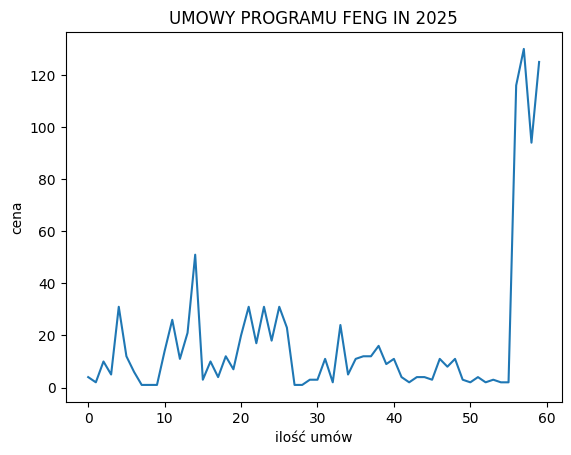

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(df.UMOWY)
plt.title("UMOWY PROGRAMU FENG IN 2025")
plt.xlabel("ilość umów")
plt.ylabel("cena")
plt.savefig("plotWs3.svg", format="svg", bbox_inches="tight", transparent=True)
plt.show()
# Save the plot as an SVG file

